# CAB420 - Plot Gallery
## Part 4: DCNN Related Plots
Dr Simon Denman (s.denman@qut.edu.au)

## Overview

This is part 4 of the plot gallery. This part is into deep nets, and the sort of plots that we will use and see there. Plots that relate to how we'd evaluate these things are not shown here - refer to part 2 (regression) or part 3 (classification) for these.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import datetime
import numpy

import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

### Data and Models

Rather than use fake data (which is a bit less trivial for a DCNN), we'll just use fashion MNIST. For variety, I'll create four models:
* One that will more or less go ok
* One that will train too fast, and be a little unstable
* One that will overfit
* One that will underfit/fail to learn entirely

Please note we're not worried about making these optimal - we're just wanting some stuff to plot.

In [2]:
# somewhat sensible model
def model1():
    inputs = keras.Input(shape=(28, 28, 1, ), name='img')
    x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(inputs)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(256, activation='relu', name='dense_1')(x)
    x = layers.Dense(64, activation='relu', name='dense_2')(x)
    outputs = layers.Dense(10, activation=None)(x)

    model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_cnn_model')
    return model_cnn

# somewhat sensible model
def model2():
    inputs = keras.Input(shape=(28, 28, 1, ), name='img')
    x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(inputs)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation=None)(x)

    model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_cnn_model')
    return model_cnn

# for overfitting, just a huge number of filters, and I'll train with less data
def model3():
    inputs = keras.Input(shape=(28, 28, 1, ), name='img')
    x = layers.Conv2D(filters=4, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(10, activation=None)(x)

    model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_cnn_model')
    return model_cnn

# underfit/fail to learn, just a crazy amount of dropout
def model4():
    inputs = keras.Input(shape=(28, 28, 1, ), name='img')
    x = layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(inputs)
    x = layers.Dropout(0.9)(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Dropout(0.9)(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = layers.Dropout(0.9)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation=None)(x)

    model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_cnn_model')    
    return model_cnn

# simple training function
def train(model, x_train, y_train, x_val, y_val, epochs, lr = 0.001):
    
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=keras.optimizers.Adam(learning_rate = lr),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=128, epochs=epochs, validation_data=(x_val, y_val), verbose=False)
    
    return model, history
    
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
model_1 = model1()
model_2 = model2()
model_3 = model3()
model_4 = model4()

model_1, model_1_history = train(model_1, x_train, y_train, x_test, y_test, epochs = 10)
model_2, model_2_history = train(model_2, x_train[:10000,:], y_train[:10000], x_test, y_test, epochs = 250, lr = 0.025)
model_3, model_3_history = train(model_3, x_train[:10000,:], y_train[:10000], x_test, y_test, epochs = 250)
model_4, model_4_history = train(model_4, x_train, y_train, x_test, y_test, epochs = 20)

model_1_embedding_1 = keras.Model(inputs = model_1.input, outputs = model_1.get_layer('flatten').output)
model_1_embedding_2 = keras.Model(inputs = model_1.input, outputs = model_1.get_layer('dense_1').output)
model_1_embedding_3 = keras.Model(inputs = model_1.input, outputs = model_1.get_layer('dense_2').output)

### Network Graphs

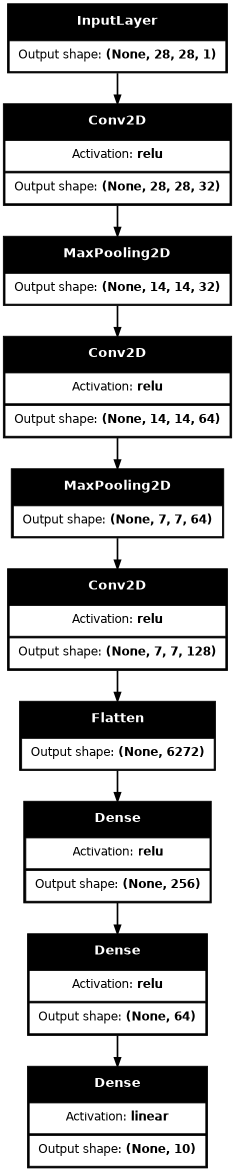

In [3]:
keras.utils.plot_model(model_1, show_shapes=True, dpi=60, show_layer_activations=True)

**What's it show?**
The structure of a network. This shows the layers, their types, and how they connect. There are a few options regarding what is displayed, which you can check out in [the documentation](https://keras.io/api/utils/model_plotting_utils/).

**When would you use it?**
When visualising a network's structure. This is a good thing to do as a sanity check if you've got multiple branches, skip connections, or similar things where you want to make sure that you've got things layed out the way you want. It's also really handy for things like reports if you need to include the network structure.

**What does it not show?**
Layer configuration details are not always clear. For example, while you can see how big a dense layer is, you don't information on a convolution 2D layer (such as the number of filters, or the size of the filters). This also doesn't show things like loss functions, or any training information, it's just the network layout.

### Training Plots

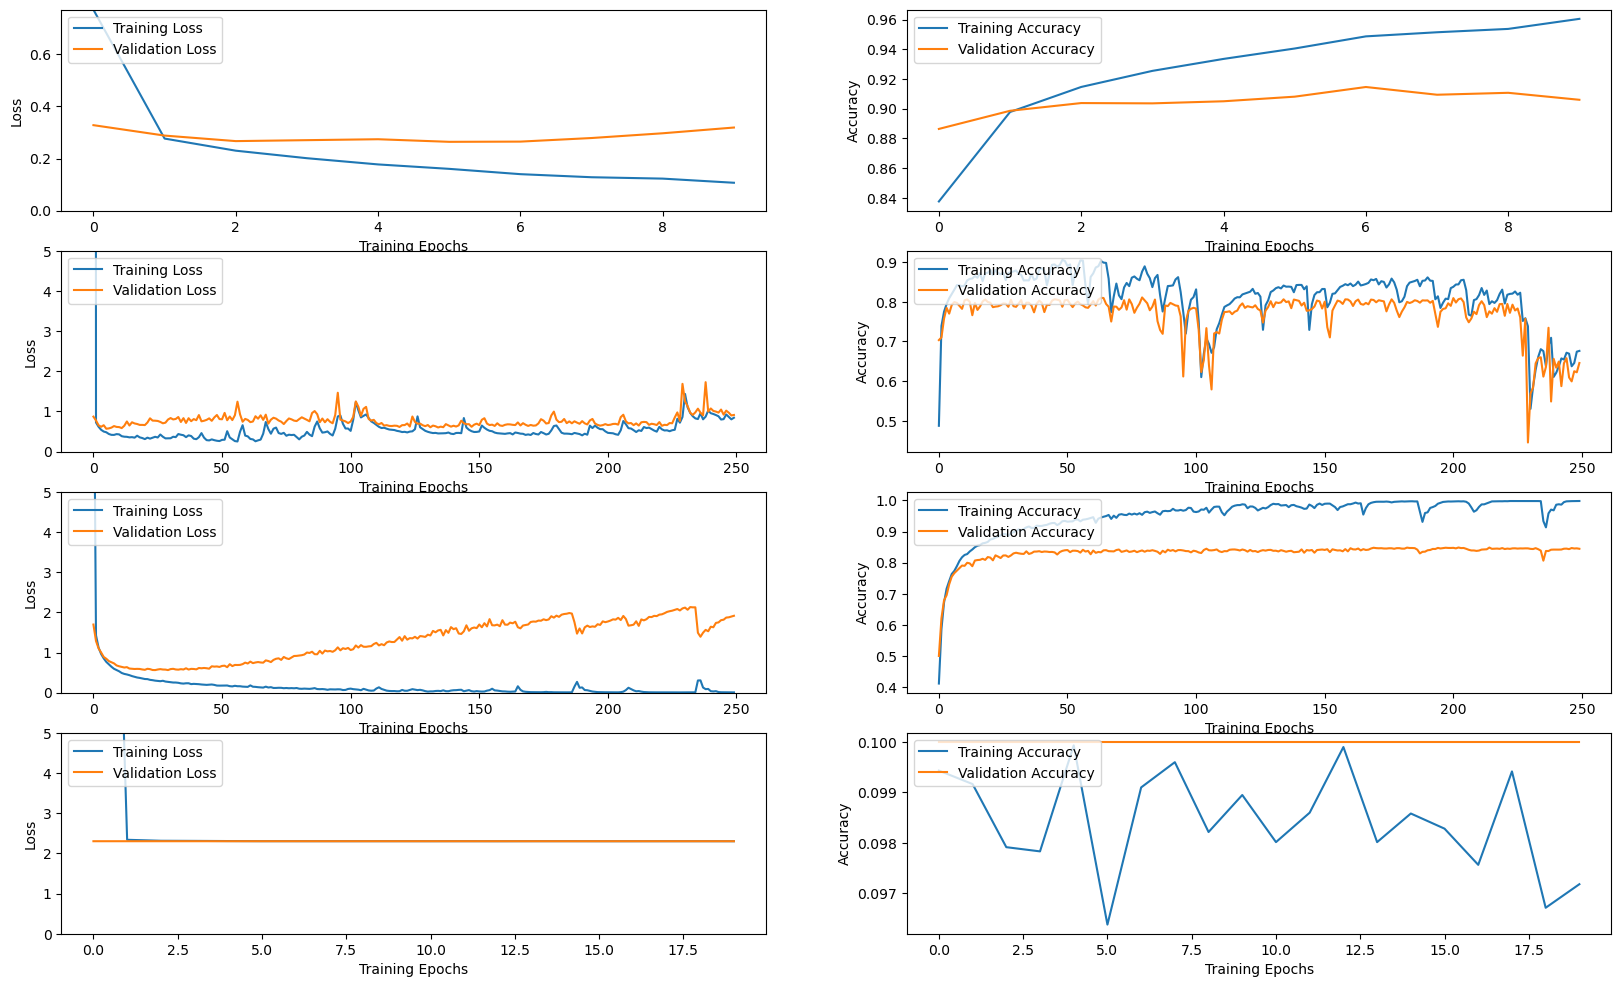

In [4]:
def plot_history(history, ax_1, ax_2):
    ax_1.plot(history['loss'], label='Training Loss')
    ax_1.plot(history['val_loss'], label='Validation Loss')
    ax_1.set_xlabel('Training Epochs')
    ax_1.set_ylabel('Loss')
    ax_1.legend(loc='upper left')
    # NOTE - I have this here to make some characteristics of the loss curves a bit easier to see. The value of 5
    # here is a bit arbitrary, and would not be appropriate in different settings.
    ax_1.set_ylim((0, min(5, numpy.max(history['loss']))))

    ax_2.plot(history['accuracy'], label='Training Accuracy')
    ax_2.plot(history['val_accuracy'], label='Validation Accuracy')
    ax_2.set_xlabel('Training Epochs')
    ax_2.set_ylabel('Accuracy')
    ax_2.legend(loc='upper left')
    
fig = plt.figure(figsize=[20, 12])
ax_1 = fig.add_subplot(4, 2, 1)
ax_2 = fig.add_subplot(4, 2, 2)
plot_history(model_1_history.history, ax_1, ax_2)

ax_1 = fig.add_subplot(4, 2, 3)
ax_2 = fig.add_subplot(4, 2, 4)
plot_history(model_2_history.history, ax_1, ax_2)

ax_1 = fig.add_subplot(4, 2, 5)
ax_2 = fig.add_subplot(4, 2, 6)
plot_history(model_3_history.history, ax_1, ax_2)

ax_1 = fig.add_subplot(4, 2, 7)
ax_2 = fig.add_subplot(4, 2, 8)
plot_history(model_4_history.history, ax_1, ax_2)

**What's it show?**
Training results for a network. We can display this a lot of ways, but what I've gone for above is having the loss and the accuracy on different sets of axes. These have different scales, and while sometimes having both on one is clear (and compact) in other instances it can make things harder to read.

Considering the two plots, what we're looking for is:
* Is our training performance improving? We're looking for our training loss to be continually going down, and potentially reaching some plateau. We don't see a plateau above, but on larger datasets with more complex models, you will see this. We're looking for similar things in our accuracy plot, this gradually increasing here, which is what we'd like. If we're taking a long time to converge, it could mean we need to increase our learning rate.
* Is training stable? Ideally, we'd like to see fairly smooth curves. rapid fluctuations, in either validation or training performance, may indicate that things are unstable, i.e. out network parameters are not converging smoothly and are changing a lot. In such a case, we could consider lowering the learning rate (to make smaller parameter updates), or increasing the batch size (so that each update is based on a larger number of samples).
* Are we overfitting? We'd like to see training and validation performance being nice and similar. Usually, we'll see at least some gap between the two, and as we train for longer this gap will grow. Typically, we'll seek to stop training once the validation improvements taper off, before the network starts to badly overfit, which we'll consider to be a situation where the validation loss, and potentially the validation accuracy, starts going backwards.

Considering the above pairs of plots, we have the following:
* In the first row, the model has trained ok. We have the model beginning to overfit (gap between training and validation performance is growing), but validation performance has perhaps only just started to drop off. The performance gap between validation and training is also only a few percent. Training has been reasonably stable, with no wild swings in performance.
* In the second row, we can see that training has been much less stable. Loss and accuracy are both bouncing around quite a bit, and performance initially converged very rapidly (a very sharp drop in loss/increase in accuracy, in the first epoch). This suggests that the learning rate is perhaps a bit fast. Note that we saw a slower initial drop but still had the fluctuating values, then parameters relating to things such as momentum or weight decay may be of interest. 
* The third rows shows a severe case of overfitting. Here, training should have stopped around ~20 epochs. After this point, the validation loss has started to go backwards, and performance on the training set has continued to march towards perfect accuracy. 
* The fourth row shows a model that has failed to learn. Loss curves are flat after an initial drop. Accuracy curves show no variation for the validation accuracy, and the training accuracy varying very slightly around random chance (10%, there are 10 classes in the dataset). The cause here is a silly amount of dropout, but other causes could be the network being too deep, regularisation being too strong, learning rate being way too slow or other poor optimiser parameters, errors in the data (lables not being read properly, inputs and outputs not corresponding, pre-processing gone wrong that's destroyed the input data). Sometimes, this could also just be an unlucky initialisation of the network and a second training run will work.

**When would you use it?**
After you've trained a network. This is a great thing to look at to make sure:
* You haven't over- or under-trained your network, and that performance actually is converging
* That you're learning rate is sensible (i.e. the network is not training too fast or too slow)
* That overfitting it not too severe (i.e. the gap between validation and training performance is not too large)

Note that you may not always be able to fix that last one - at least not totally (you'll probably be able to reduce the gap between them though up to some point). 

**What does it not show?**
Characteristics of the errors the model is making, or any issues with the architecture or optimiser (beyond learning rate) that may be causing the issues. These plots are great to tell you when something has gone wrong, but to a large extent it's then up to you to figure out what exactly that is.

### Embedding Plots

Text(0.5, 1.0, 'Embeddings after Second Dense Layer')

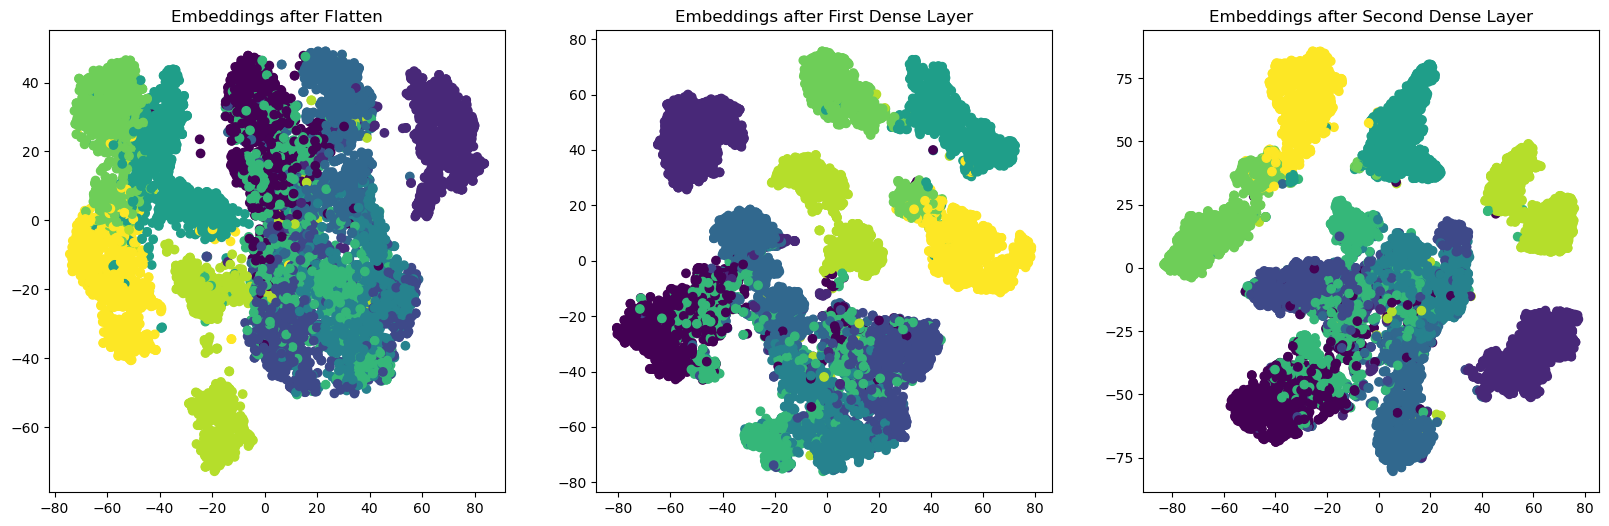

In [5]:
flatten_embeddings = model_1_embedding_1.predict(x_test, verbose=False)
dense_1_embeddings = model_1_embedding_2.predict(x_test, verbose=False)
dense_2_embeddings = model_1_embedding_3.predict(x_test, verbose=False)

tsne_embeddings_1 = TSNE(random_state=4).fit_transform(flatten_embeddings)
tsne_embeddings_2 = TSNE(random_state=4).fit_transform(dense_1_embeddings)
tsne_embeddings_3 = TSNE(random_state=4).fit_transform(dense_2_embeddings)

fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 3, 1)
ax.scatter(tsne_embeddings_1[:,0], tsne_embeddings_1[:,1], c = y_test.flatten())
ax.set_title('Embeddings after Flatten')

ax = fig.add_subplot(1, 3, 2)
ax.scatter(tsne_embeddings_2[:,0], tsne_embeddings_2[:,1], c = y_test.flatten())
ax.set_title('Embeddings after First Dense Layer')

ax = fig.add_subplot(1, 3, 3)
ax.scatter(tsne_embeddings_3[:,0], tsne_embeddings_3[:,1], c = y_test.flatten());
ax.set_title('Embeddings after Second Dense Layer')

**What's it show?**
A visualisation of the network embeddings. Typically, we'll pick a layer that has some significance, maybe it's the final embedding we're learning via a metric learning approach, maybe it's the bottleneck in auto-encoder. Usually whatever it is, it will be very high dimensional, so to plot this we use TSNE to get a 2D approximation of the data (we could use PCA as well, though generally TSNE works better with a deep network embedding as PCA simply does not capture enough variation in the first two components) and then draw a scatter plot of this data, using class labels or other key information to help illustrate and highlight things of interest.

In the above, we have three plots from three consecutive layers in our first deep network (the one that is vaguely sensible). From left to right, we get closer and closer to the output. The left-most plot is the output of the flatten straight after the last convolution. The middle plot is after the first dense layer, the right-most if after the second dense layer, directly before the output layer. As we get closer to the output, we can see increasingly clear clusters emerging for the classes - essentially the learned representation contains more and more class-specific information.

**When would you use it?**
As part of deep network evaluation and troubleshooting. Such embedding plots can help you understand if you're network has learned features that will help discriminate between some classes, or if there is some confusion with samples for different classes lying in similar regions. Plots can also help in understanding why some layers and/or network offer better embeddings for a given task than others, by allowing you to visualise class separation. You could also use plots to look at differences between training and test set embeddings to understand if there is some sort of distribution shift present between the different sets.

**What does it not show?**
It doesn't actually convey model accuracy, and it's a 2D projection of the embedding, not the actual embedding itself. Unless you're learning a 2D embedding (in which case you don't need TSNE), what you see here is not the actual data itself and some information is certainly lost (not to mention the non-stochastic nature of TSNE). It also doesn't tell you anything about if the model has over- or under-fit, or what sort of changes you would need to make to a network to get a better representation. 

### Things not shown

There are some other niche plots that we've used here and there, things like visualising filters or filter responses. These are really rather specialised things, and so are not covered here as you're simply not likely to look at these very often.

The other sort of plots that you will use with deep nets are the usual evaluation plots, whether it's for classification or regression. For those, see the regression and classification guides - though note that with deep nets assumptions like normally distributed residuals, etc, are totally out the window. 